In [1]:
def matrixRankTransform(matrix):
              elts = []
              rank_matrix = [None] * len(matrix)
              for i in range(len(matrix)):
                  rank_matrix[i] = [0] * len(matrix[i])
                  for j in range(len(matrix[i])):
                      elts.append((matrix[i][j], i, j))
              elts.sort(key=lambda x:x[0])
              
              max_rank_by_row = [0] * len(matrix)
              max_rank_by_col = [0] * len(matrix[0])
              
              def find(p, u):
                  if p[u] == u:
                      return u
                  p[u] = find(p, p[u])
                  return p[u]
              
              def assign_rank(same_val_cells):
                  if len(same_val_cells) == 1:
                      # No need to do the fancy disjoint set logic if there's only one value
                      _, r, c = same_val_cells[0]
                      rank = max(max_rank_by_row[r], max_rank_by_col[c]) + 1
                      rank_matrix[r][c] = max_rank_by_row[r] = max_rank_by_col[c] = rank
                      return
                  
            # We treat each row, represented as (r, None) as a disjoint set, and each column,
            # represented as (None, c) as a disjoint set. And then whenever we encounter a cell at (r, c), 
            # we union the disjoint set (r, None) with (None, c)
                  p = {}
                  rank_by_root = {}
                  for r in range(len(matrix)):
                      u = (r, None)
                      p[u] = u
                      # The rank of any cell on this row, in this disjoint-set, must be higher than 
                      # existing cells with lower values
                      rank_by_root[u] = max_rank_by_row[r] + 1
                  for c in range(len(matrix[0])):
                      u = (None, c)
                      p[u] = u
                      # The rank of any cell on this column must be higher than existing cells
                      # with lower values
                      rank_by_root[u] = max_rank_by_col[c] + 1

                  for e in same_val_cells:
                      val, r, c = e
                      u = (r, None)
                      v = (None, c)
                      root_u = find(p, u)
                      root_v = find(p, v)
                      if root_u != root_v:
                          # We have a cell that's at the intersection of row r and column c, so 
                          # we shall union the row and column into any existing rows and/or columns
                          # as one disjoint-set. To be consistent, the new disjoint-set must have
                          # the rank that's max of the ranks of just-joint parts.
                          p[root_u] = root_v
                          rank_by_root[root_v] = max(rank_by_root[root_u], rank_by_root[root_v])

                  for e in same_val_cells:
                      val, r, c = e
                      u = (r, None)
                      rank = rank_by_root[find(p, u)]
                      rank_matrix[r][c] = max_rank_by_row[r] = max_rank_by_col[c] = rank

              prev_val = elts[0][0]
              same_val_cells = [elts[0]]
              for i in range(1, len(elts)):
                  val, r, c = elts[i]
                  if val == prev_val:
                      same_val_cells.append(elts[i])
                      continue
                  
                  # For cells with the same values, assign rank to them together to ensure their
                  # ranks remain consistent across all rows and colums wherever the values appear
                  assign_rank(same_val_cells)
                  # Start accumulating a new group with the same value
                  same_val_cells = [elts[i]]
                  prev_val = val
              assign_rank(same_val_cells)
              
              return rank_matrix

In [ ]:
matrix = [[20,-21,14], [-19,4,19], [22,-47,24], [-19,4,19]]
rm = []

In [ ]:
rm = matrixRankTransform(matrix)

In [ ]:
print(rm)

[[4, 2, 3], [1, 3, 4], [5, 1, 6], [1, 3, 4]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open('/content/drive/MyDrive/Copy of Barbara.png')
image = np.array(image)
print(image.shape)

(128, 128)


In [ ]:
rt_img = matrixRankTransform(image)
rt_img = np.array(rt_img)

In [ ]:
print(rt_img)
print(image)

[[170 176 152 ...  70  79  79]
 [172 178 142 ...  81  77  85]
 [173 178 137 ...  79  79  98]
 ...
 [ 83  83  83 ...  98 101  95]
 [ 80  83  84 ...  86  92  92]
 [ 77  79  78 ...  72  84  91]]
[[191 197 173 ...  91 100 100]
 [193 199 163 ... 102  98 106]
 [194 199 158 ... 100 100 119]
 ...
 [104 104 104 ... 119 122 116]
 [101 104 105 ... 107 113 113]
 [ 98 100  99 ...  94 105 112]]


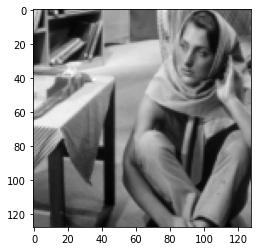

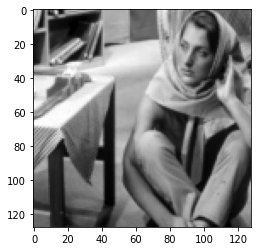

In [ ]:
plt.imshow(image, cmap = 'gray')
plt.show()
plt.imshow(rt_img, cmap = 'gray')
plt.show()